### Başlangıçta gerekli olan kütüphaneler import edildi.

In [33]:
import os
import numpy as np
import shutil
import glob
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tqdm import tqdm
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img


Device mapping: no known devices.


### Veri dosyası projeye aktarıldı.

In [34]:
import pathlib
dataset_url = "https://www.microsoft.com/en-us/download/details.aspx?id=54765"
data_dir = tf.keras.utils.get_file('PetImages', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

### Veri dosyasında uzantısı .jpg olan resimler çekilip, listeye çevrildi ve listenin uzunluğu yazdırıldı.

In [35]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

25000


### Resimleri yeniden boyutlandırmakiçin değişkenler oluşturuldu ve resimlerin yeni boyut değerleri verildi.

In [36]:
batch_size = 32
img_height = 150
img_width = 150

### Veri dosyası train ve validation şeklinde bölündü.

In [37]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 25000 files belonging to 4 classes.
Using 20000 files for training.


In [38]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 25000 files belonging to 4 classes.
Using 5000 files for validation.


### Sınıf isimleri yazdırıldı.

In [39]:
class_names = train_ds.class_names
print(class_names)

['Cat', 'Dog', 'assets', 'variables']


### Kullanılacak model import edildi. 
### Model compile edildi ve model yapılandırılmasını kontrol etmek için summary metodu kullanıldı..

In [40]:

import tensorflow as tf
from tensorflow.keras.layers import  Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

input_shape = (150, 150, 3)

vgg = VGG16(include_top=False, weights='imagenet',input_shape=input_shape)

vgg.trainable = False
for layer in vgg.layers[:-8]:
    layer.trainable = False

vgg_output = vgg.layers[-1].output

head_model = Flatten()(vgg_output)
head_model = Dense(512, activation='relu')(head_model)
head_model = Dropout(0.3)(head_model)

head_model = Dense(512, activation='relu')(head_model)
head_model = Dropout(0.3)(head_model)

output = Dense(1, activation='sigmoid')(head_model)
model = Model(vgg.input, output)


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])


model.summary()



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

### Kullanılacak etiketler oluşturuldu.

In [41]:
import pandas as pd
layers = [(layer, layer.name, layer.trainable) for layer in model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable']) 

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at...,input_2,False
1,<keras.layers.convolutional.Conv2D object at 0...,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0...,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0...,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0...,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0...,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0...,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0...,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0...,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0...,block3_conv3,False


### Model fit edildi.

In [42]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

filepath = "C:/Users/Arife/.keras/datasets/PetImages"

save_model_cb = ModelCheckpoint(
    filepath, monitor='val_accuracy', verbose=2, save_best_only=True, mode='max')
# callback to stop the training if no improvement
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min')

callbacks_list = [save_model_cb, early_stopping_cb]

history = model.fit_generator(train_ds, steps_per_epoch=10, epochs=10,
                              validation_data=val_ds, validation_steps=5,
                              verbose=2, callbacks=callbacks_list)

Epoch 1/10

Epoch 1: val_accuracy improved from -inf to 0.86250, saving model to C:/Users/Arife/.keras/datasets\PetImages
INFO:tensorflow:Assets written to: C:/Users/Arife/.keras/datasets\PetImages\assets
10/10 - 46s - loss: 6.2225 - accuracy: 0.6500 - val_loss: 1.1218 - val_accuracy: 0.8625 - 46s/epoch - 5s/step
Epoch 2/10

Epoch 2: val_accuracy improved from 0.86250 to 0.88125, saving model to C:/Users/Arife/.keras/datasets\PetImages
INFO:tensorflow:Assets written to: C:/Users/Arife/.keras/datasets\PetImages\assets
10/10 - 40s - loss: 1.9304 - accuracy: 0.8531 - val_loss: 1.1018 - val_accuracy: 0.8813 - 40s/epoch - 4s/step
Epoch 3/10

Epoch 3: val_accuracy improved from 0.88125 to 0.88750, saving model to C:/Users/Arife/.keras/datasets\PetImages
INFO:tensorflow:Assets written to: C:/Users/Arife/.keras/datasets\PetImages\assets
10/10 - 44s - loss: 1.7559 - accuracy: 0.8500 - val_loss: 1.1553 - val_accuracy: 0.8875 - 44s/epoch - 4s/step
Epoch 4/10

Epoch 4: val_accuracy did not improve

### Fit edilen modelin accuary ve loss grafiği çizdirildi.

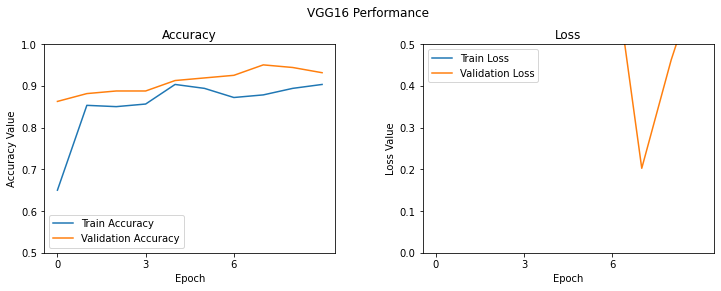

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('VGG16 Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
ax1.set_ylim((0.5,1))
ax2.set_ylim((0,0.5))

epoch_list = history.epoch
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, epoch_list[-1], 3))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, epoch_list[-1], 3))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [68]:
##Denemek için epoch sayısı yükseltilerek tekrar fit edildi.

history = model.fit_generator(train_ds, steps_per_epoch=15, epochs=15,
                              validation_data=val_ds, validation_steps=7,
                              verbose=2, callbacks=callbacks_list)

Epoch 1/15

Epoch 1: val_accuracy did not improve from 0.95000
15/15 - 47s - loss: 0.5076 - accuracy: 0.9479 - val_loss: 0.3008 - val_accuracy: 0.9438 - 47s/epoch - 3s/step
Epoch 2/15

Epoch 2: val_accuracy did not improve from 0.95000
15/15 - 50s - loss: 0.4836 - accuracy: 0.9229 - val_loss: 1.6463 - val_accuracy: 0.8625 - 50s/epoch - 3s/step
Epoch 3/15

Epoch 3: val_accuracy did not improve from 0.95000
15/15 - 49s - loss: 0.6155 - accuracy: 0.9333 - val_loss: 0.5002 - val_accuracy: 0.9312 - 49s/epoch - 3s/step
Epoch 4/15

Epoch 4: val_accuracy did not improve from 0.95000
15/15 - 50s - loss: 0.4823 - accuracy: 0.9271 - val_loss: 0.5521 - val_accuracy: 0.9500 - 50s/epoch - 3s/step
Epoch 5/15

Epoch 5: val_accuracy did not improve from 0.95000
15/15 - 52s - loss: 0.5632 - accuracy: 0.9354 - val_loss: 0.8179 - val_accuracy: 0.9250 - 52s/epoch - 3s/step
Epoch 6/15

Epoch 6: val_accuracy did not improve from 0.95000
15/15 - 54s - loss: 0.5537 - accuracy: 0.9312 - val_loss: 1.0847 - val_a

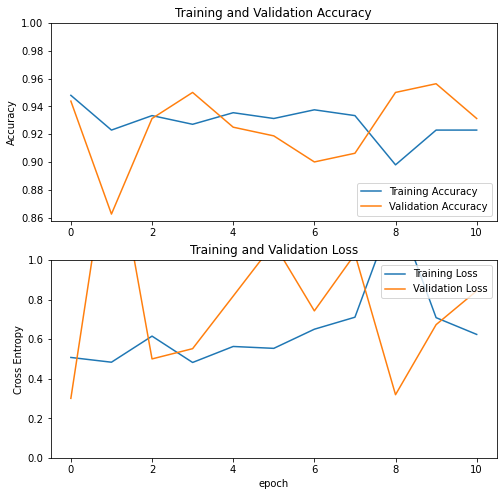

In [71]:
#Son fit edilen modelin loss ve accuary grafiği çizdirildi.

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


### Sonuç olarak kullanılan model 10 epoch kullanıldığında iyi bir accuary çizdi. Yani doğru tahmin yapabilir diyebiliriz. 
### Fakat epoch 15'e çıktığında model karmaşık bir hal aldı. 